<a href="https://colab.research.google.com/github/Prashant-Shaw/NETFLIX-Movies-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised ML - Clustering
##### **Contribution**    - Individual
##### **Name** - Prashant Shaw
##### **email** - prashantshaw77777@gmail.com 

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Dataset Loading

In [2]:
drive.mount('/content/mydrive')
nf_path = '/content/mydrive/MyDrive/AlmaBetter/Capstone Project - Unsupervised ML Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
nf_df = pd.read_csv(nf_path)

Mounted at /content/mydrive


### Dataset First View

In [3]:
#Let's look at the dataset
nf_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
#Checking the shape of the dataset
nf_df.shape

(7787, 12)

There are 7787 rows and 12 features/columns in the dataset. Let's explore information of dataset.

### Dataset Information

In [5]:
#Checking the info of the dataset
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
#Checking the unique values in the dataset
nf_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

There are 7787 unique entries in the show_id which is same as the number of rows of the dataset. So, we can infer that there are no duplicate entries in the dataset. The below code also confirms this.

In [7]:
#Confirming if any duplicate value present
nf_df.duplicated().value_counts()

False    7787
dtype: int64

There is no duplicate entries in the dataset.

#### Missing Values/Null Values

In [8]:
#Checking for null values in the dataset
nf_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are some null values in director, cast, country, date_added & rating. Let's visuallize these in percentage.

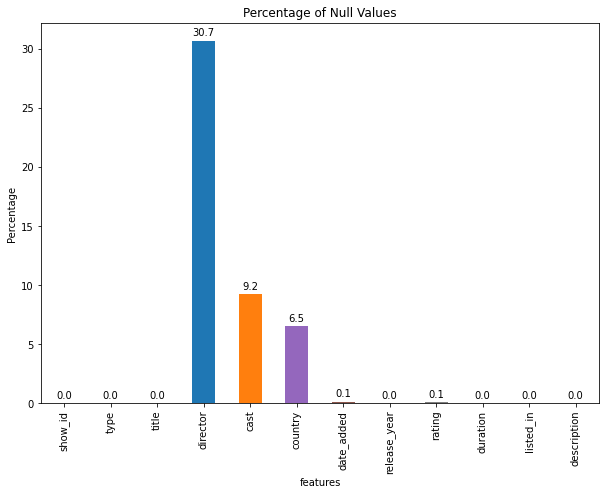

In [9]:
# Visualizing the missing values
plt.figure(figsize = (10,7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#1f77b4', '#ff7f0e', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plots = (nf_df.isnull().sum()/len(nf_df)*100).plot(kind = "bar", title = "Percentage of Null Values", color = colors) 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'), (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("features")
plt.ylabel("Percentage")
plt.show()

### Initial insights on the dataset -

This dataset consists of tv shows and movies available on Netflix as of 2019.

The dataset contains 7787 rows/observations and 12 columns/features.
There are no duplicate values in the dataset. 

director has 2389 null values, cast has 718 null values, country has 507 null values, date_added has 10 null values and rating has 7 null values.

release_year is of int dtype and other features are of object dtype.

We will be dealing with null values and dtypes in later sections of the project.

## ***2. Understanding Your Variables***

In [10]:
#Columns in the dataset
nf_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Here all are independent variable. There is no target or dependent variable which makes this a problem of Unsupervised Machine Learning. 

### Variables Description 

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [11]:
#Datatype of each features
nf_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [12]:
#Description of the data
nf_df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


## 3. ***Data Wrangling***

### Handling Missing Values

* We are replacing the missing values in the director, cast, and country attributes with 'Unknown'
* 10 records with missing values in the date_added column can be dropped.
* The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [13]:
#Handling null values
nf_df[['director','cast','country']] = nf_df[['director','cast','country']].fillna('Unknown')
nf_df['rating'] = nf_df['rating'].fillna(nf_df['rating'].mode()[0])
nf_df.dropna(axis=0, inplace = True)

In [14]:
#Resetting the index as we have dropped some rows.
nf_df.reset_index(inplace = True)

In [15]:
#Confirming if all the null values have been filled
nf_df.isnull().sum()

index           0
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

All the null data have been handled successfully.

### Typecasting "date_added" from object to datetime

In [16]:
#Changing the dtype of date added from object to datetime
nf_df["date_added"] = pd.to_datetime(nf_df['date_added'])

In [17]:
#Checking when the first show/movie was added in Netflix
nf_df["date_added"].min()

Timestamp('2008-01-01 00:00:00')

In [18]:
#Checking when last show/movie was added in Netflix
nf_df["date_added"].max()

Timestamp('2021-01-16 00:00:00')

First show/movie was added on "1st Jan 2008" and last show/movie was added on "16 Jan 2021".

In [19]:
# Adding new attributes month and year of date added
nf_df['month_added'] = nf_df['date_added'].dt.month
nf_df['year_added'] = nf_df['date_added'].dt.year

#Droping the 'date_added' feature as we have already extracted month and year from date added
nf_df.drop('date_added', axis=1, inplace=True)

### Typecasting "duration" from object to datetime

In [20]:
# Changing the duration columnn from object to int dtype. 
# Note - Here duration for Movies will be in mins and duration for TV Shows will be in seasons. While visualizing we will be visuallizing these two separately.

nf_df['duration'] = nf_df['duration'].apply(lambda x: int(x.split()[0]))

In [21]:
#Head of the dataset after handling all the data
nf_df.head()

,index,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020
1,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016
2,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018
3,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017
4,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020


### Following are the insights of Data Wrangling section -

* All the null values have been filled and we have deleted 10 rows where date_added has null values.
* date_added has been changed from object dtype to datetime dtype. Then we extracted month and year from date_added and then we dropped date_added.
* In the dataset duration for Movies are in mins whereas duration for TV Shows are in terms of number of seasons.
* Feature duration also changed from object dtype to int. Here the units for Movies will be in mins whereas for TV Shows it will be in terms of number of seasons. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Function to plot some basic graphs

In [22]:
#Function to plot countplot
def count_plot(col, df, Order = None):
  '''This function plots the count plot for the passed feature'''
  plt.figure(figsize = (20,7))
  plt.title(f'Count plot of {col}')
  sns.countplot(x=col,data=df, order = Order)
  plt.xticks(rotation = 90)
  plt.show()

countplot will be used for the better visuallization of the observational counts of the categorical variable. As it puts observational counts in different category-based bins using bars.

In [23]:
#Function to plot Pie chart
def pie_chart(col):
  '''This function plot the pie chart for the given data.
  Pass the feature name in str to plot the pie chart.'''
  plt.rcParams['font.size'] = 12
  plt.figure(figsize = (7,7))
  exp = (0.05,)*len(nf_df[col].value_counts())
  nf_df[col].value_counts().plot.pie(autopct = '%1.2f%%', explode = exp)
  plt.title(f'percentage distribution of {col}')
  plt.axis('off')
  plt.show()

Pie charts are very much useful in displaying relative proportions of multiple classes of data. 

In [96]:
def col_word_cloud(col, w_df):
  ''' This function will show the WordCloud for the passed feature'''
  plt.figure(figsize = (15,7))
  text = " ".join(word for word in w_df[col])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

WordClouds offer a visible picture of text data. 

### Univariate Analysis

We will explore each feature one by one and will try to explore some useful insights.

#### 1. 'type' Feature

In [25]:
# Checking the number of TV Shows and Movies in the dataset
nf_df.type.value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

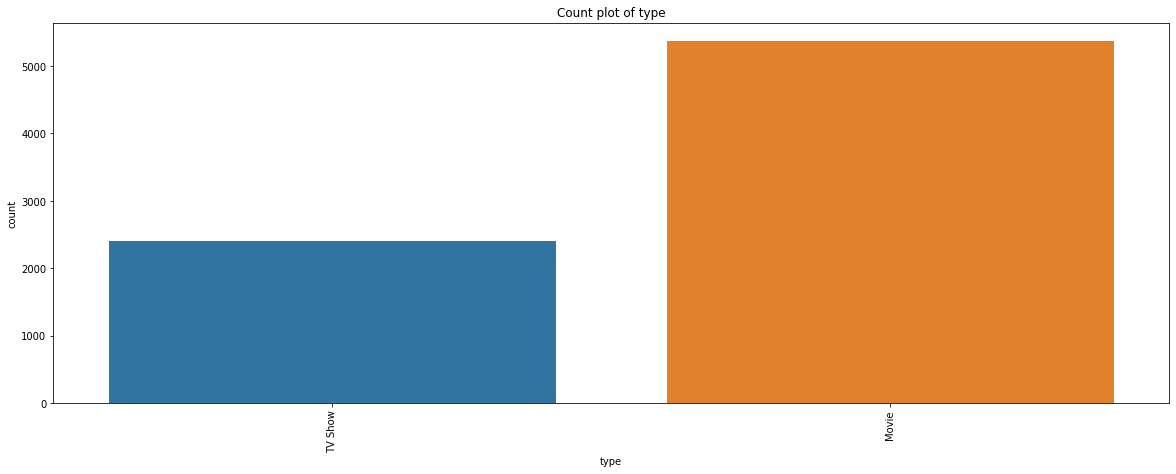

In [26]:
#Plotting the count plot for type
count_plot('type', nf_df)

In the dataset count of Movie is more than TV Shows

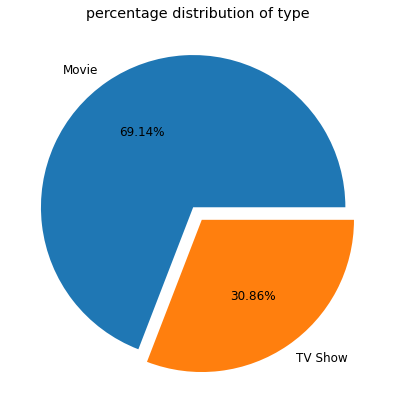

In [27]:
#Plotting the Pie Chart for type
pie_chart('type')

In the dataset around 69% of Movie is present and 31% of TV Show is present.

#### 2. title

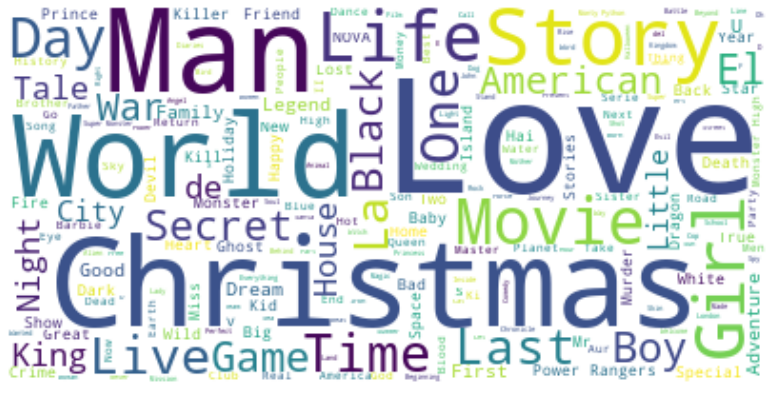

In [97]:
#Chekcing the WordCloud for words present in feature 'title'
col_word_cloud('title', nf_df)

Christmas, World, Love, Man are some of the most words in the title.

Seems like most of the shows/movies are released during Christmas.

#### 3. director

In [29]:
#Directors having most counts of movies
nf_df[nf_df['director']!= 'Unknown']['director'].value_counts().head(20)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Robert Rodriguez           8
Kunle Afolayan             8
Hakan Algül                8
Shannon Hartman            8
Johnnie To                 8
Quentin Tarantino          8
Lance Bangs                8
Don Michael Paul           7
McG                        7
Justin G. Dyck             7
Name: director, dtype: int64

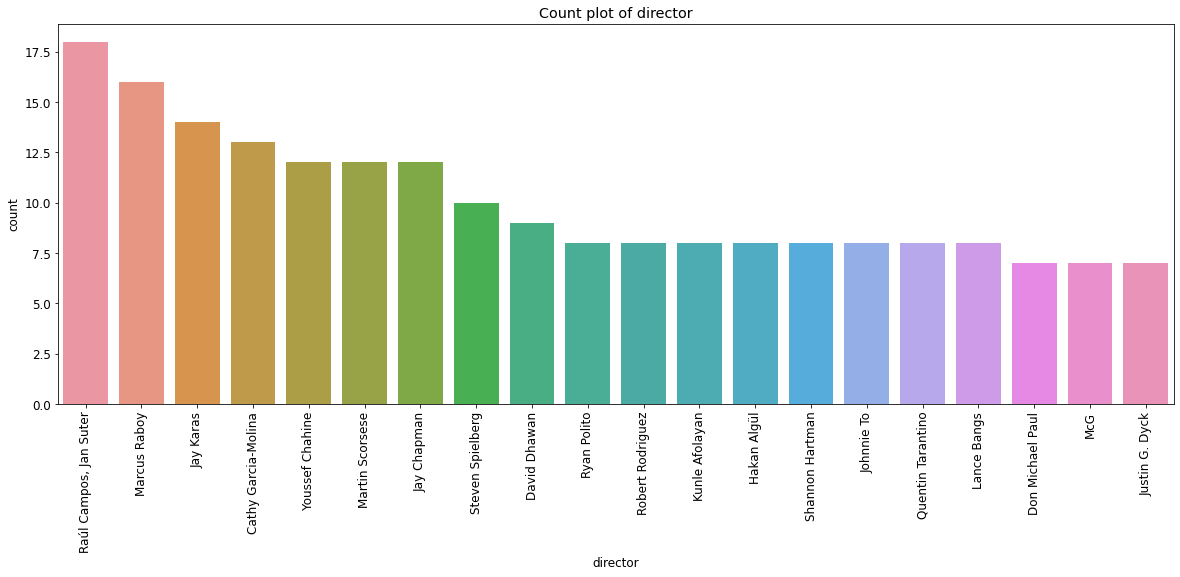

In [30]:
#Plotting the bar graph for top 20 directors who have most number of shows/movies in the dataset.
count_plot('director', nf_df, nf_df[nf_df['director']!= 'Unknown']['director'].value_counts().head(20).index)

Raúl Campos, Jan Suter has directed most of the movies for Netflix.

#### 4. cast

In [31]:
#Making a dictionary with cast name as key and number of movies/shows done by them as values.
casts = {}
cast_name = []
cast_column_splitted = []
for row in nf_df['cast']:
  if row != 'Unknown':
    cast_name.extend(row.split(","))
    
for c_name in cast_name:
  if c_name not in list(casts.keys()):
    casts[c_name] = cast_name.count(c_name)

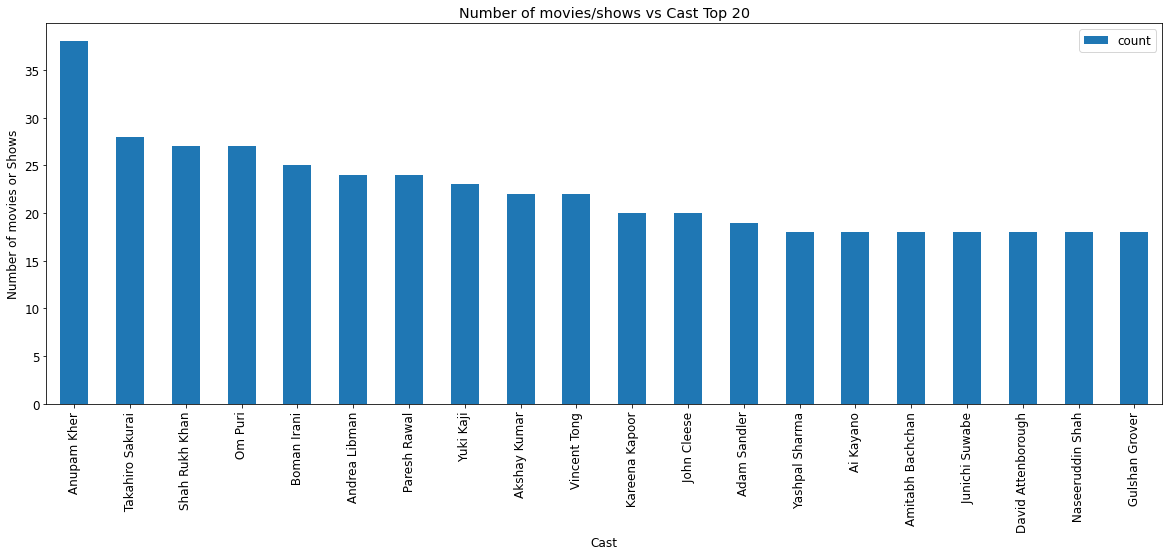

In [32]:
# Creating a DataFrame for cast for plotting & plotting the top 20 cast who are in max number of movies or shows.
cast_df = pd.DataFrame.from_dict(casts, orient='index', columns=['count'])
cast_df.sort_values('count', ascending=False).head(20).plot(kind = 'bar', figsize = (20,7))
plt.xlabel("Cast")
plt.ylabel("Number of movies or Shows")
plt.title("Number of movies/shows vs Cast Top 20")
plt.show()

Anupam Kher has acted in most of the Movies/TV shows.

#### 5. country

In [33]:
#Extracting the country names from the dataset foor plotting countplot.
countries = {}
tv_count = []
movie_count = []
row_list = []
for m in range(0,len(nf_df)):
  split = nf_df['country'][m].split(",")
  for k in split:
    if k.strip() != 'Unknown':
      row_list.append(k.strip())
      if nf_df['type'][m] == 'TV Show':
        tv_count.append(k.strip())
      if nf_df['type'][m] == 'Movie':
        movie_count.append(k.strip())
country_df1 = pd.DataFrame(data = row_list, columns = ['country'])      #For plotting countplot of country

countries['country'] = []
countries['Total Production'] = []
countries['TV Show'] = []
countries['Movie'] = []

for i in row_list:
  if i not in list(countries['country']):
    countries['country'].append(i)
    countries['Total Production'].append(row_list.count(i))
    countries['TV Show'].append(tv_count.count(i))
    countries['Movie'].append(movie_count.count(i))
    
country_df = pd.DataFrame(data = countries)                # For plotting the country wise split of Movie & TV Show
country_df.sort_values('Total Production', ascending=False, inplace = True)
country_df

,country,Total Production,TV Show,Movie
3,United States,3291,860,2431
6,India,990,75,915
12,United Kingdom,722,255,467
16,Canada,412,126,286
21,France,349,84,265
...,...,...,...,...
92,Samoa,1,0,1
93,Azerbaijan,1,1,0
94,Bermuda,1,0,1
95,Ecuador,1,0,1


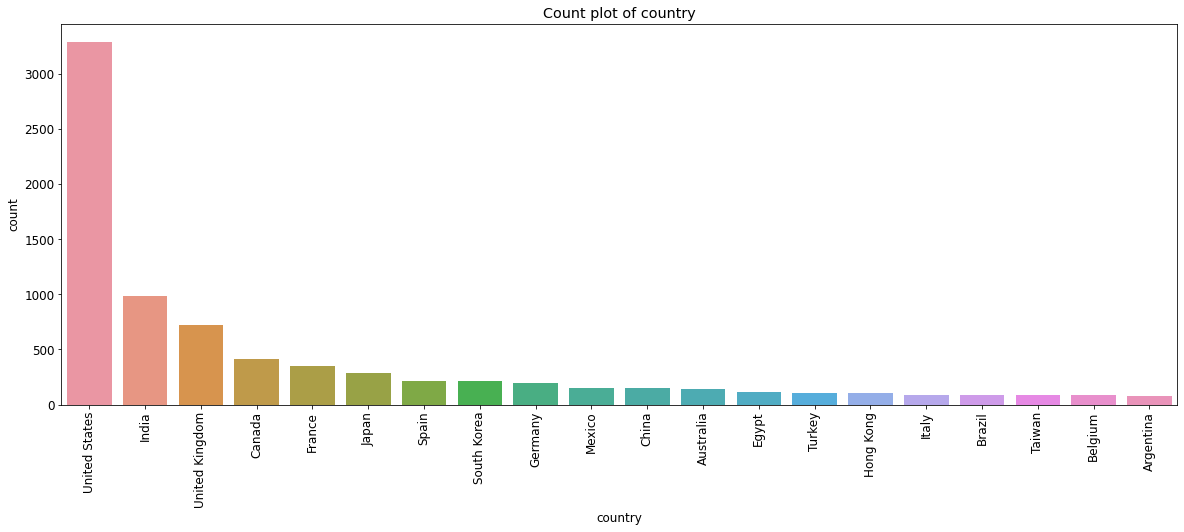

In [34]:
#Countplot of country
count_plot('country', country_df1, country_df1['country'].value_counts().head(20).index)

Above plot shows the top 20 prodcution countries. 

US, India & UK are having the most production.

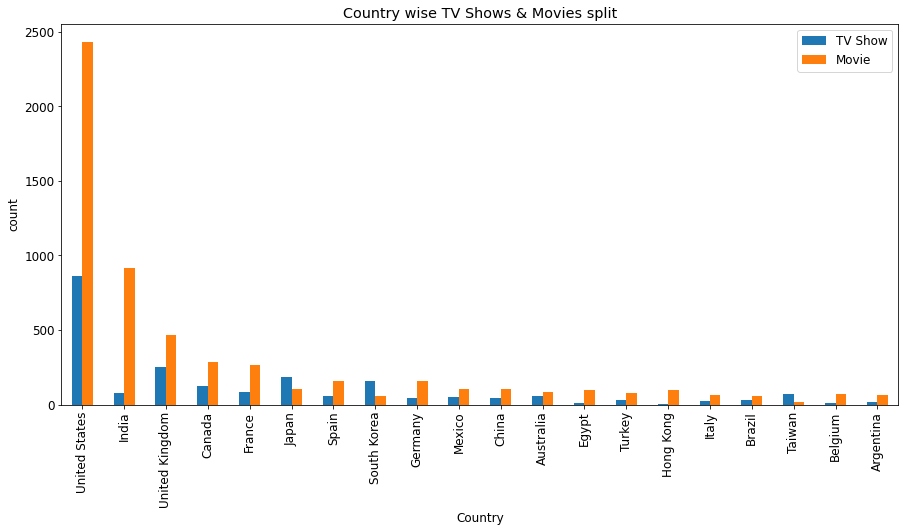

In [35]:
#Plotting country wise split of Movie & TV Show
country_df.head(20).plot(x = 'country', y = ['TV Show', 'Movie'], kind = 'bar', figsize = (15,7))
plt.xlabel('Country')
plt.ylabel('count')
plt.title('Country wise TV Shows & Movies split')
plt.show()

* For most of the countries TV Show production are lesser than Movies. 
* But we can see in Japan, South Korea, Taiwan TV Shows are more produced as compared to Movies. Animes are very famous in those countries.

#### 6.release_year

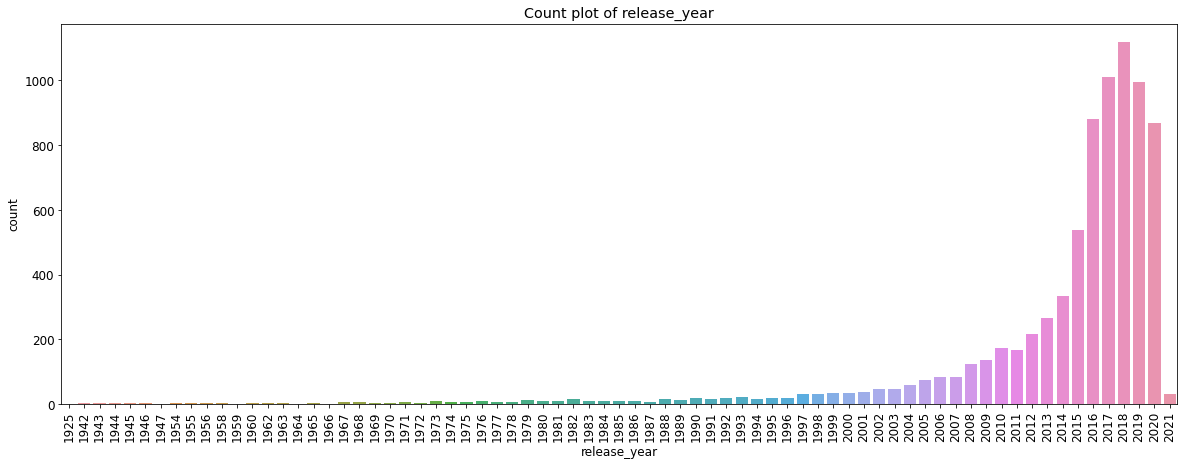

In [36]:
#Count plot for release year
count_plot('release_year', nf_df)

We can see that there is a sudden rise in the number of TV shows and Movies from year 2010.

In [37]:
#Code to plot the release year wise split of Movies and TV Shows
release_yr = {}
tv_count = []
movie_count = []
row_list = []
for m in range(0,len(nf_df)):
  row_list.append(nf_df['release_year'][m])
  if nf_df['type'][m] == 'TV Show':
    tv_count.append(nf_df['release_year'][m])
  if nf_df['type'][m] == 'Movie':
    movie_count.append(nf_df['release_year'][m])

release_yr['release_yr'] = []
release_yr['Total Released'] = []
release_yr['TV Show'] = []
release_yr['Movie'] = []

for i in row_list:
  if i not in list(release_yr['release_yr']):
    release_yr['release_yr'].append(i)
    release_yr['Total Released'].append(row_list.count(i))
    release_yr['TV Show'].append(tv_count.count(i))
    release_yr['Movie'].append(movie_count.count(i))
    
released_yr = pd.DataFrame(data = release_yr)                # For plotting the release year split of Movie & TV Show
released_yr.sort_values('release_yr', inplace = True)
released_yr

,release_yr,Total Released,TV Show,Movie
61,1925,1,1,0
62,1942,2,0,2
72,1943,3,0,3
69,1944,3,0,3
58,1945,3,0,3
...,...,...,...,...
7,2017,1012,268,744
8,2018,1120,386,734
5,2019,996,414,582
0,2020,868,457,411


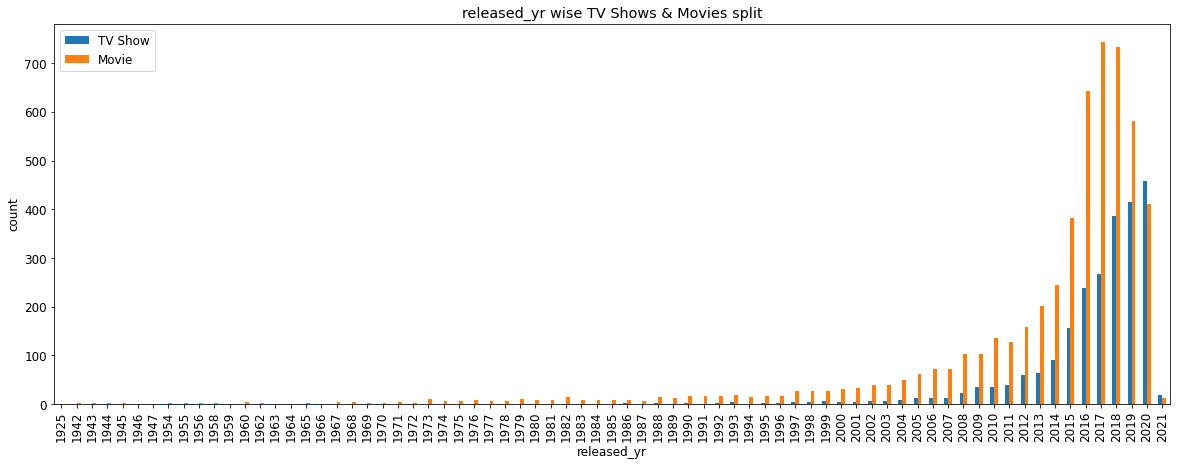

In [38]:
#Plotting release year wise split of Movie & TV Show
released_yr.plot(x = 'release_yr', y = ['TV Show', 'Movie'], kind = 'bar', figsize = (20,7))
plt.xlabel('released_yr')
plt.ylabel('count')
plt.title('released_yr wise TV Shows & Movies split')
plt.show()

There is an increase in both number of TV Shows and Movies.

In 2020 number of TV Shows were more than number of Movies.

#### 7. rating

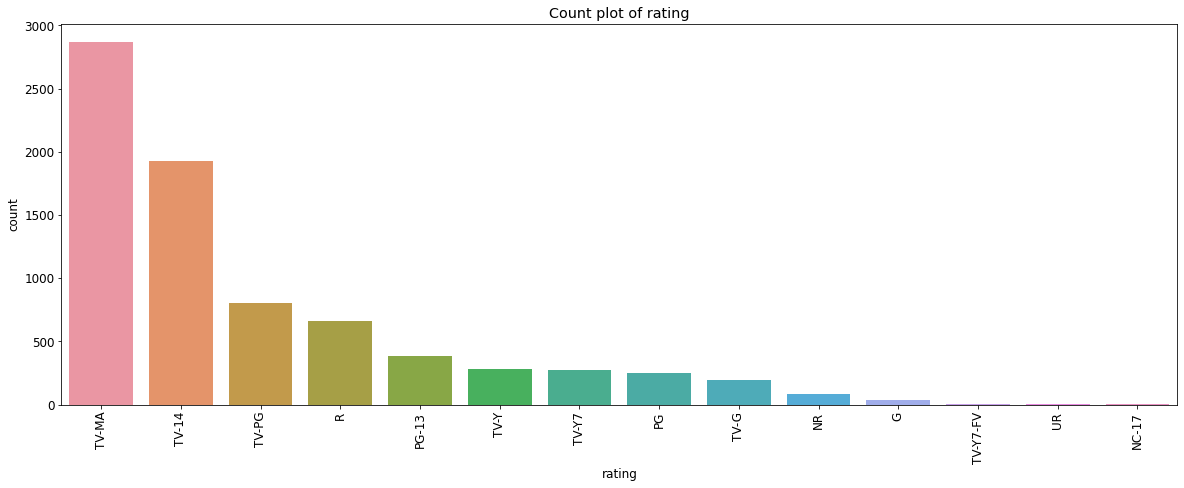

In [39]:
#Count plot for rating
count_plot('rating', nf_df, nf_df['rating'].value_counts().sort_values(ascending=False).index)

The majority of the shows on Netflix are for adults and for children above age 14.

#### 8. duration

We are using Kernel Density Estimate (KDE) plot to plot the distribution of duration for TV Show and Movie. 

Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions.

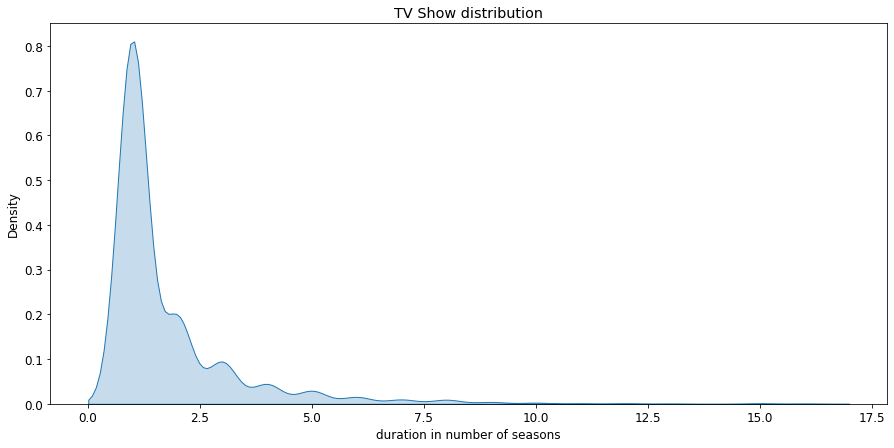

In [82]:
#Plotting distribution for TV Show duration
plt.figure(figsize = (15,7))
plt.title("TV Show distribution")
sns.kdeplot(data=nf_df[nf_df['type'] == 'TV Show']['duration'], shade=True)
plt.xlabel("duration in number of seasons")
plt.show()

From the above graph we can infer that most of the TV Shows contains 1 - 2 seasons.

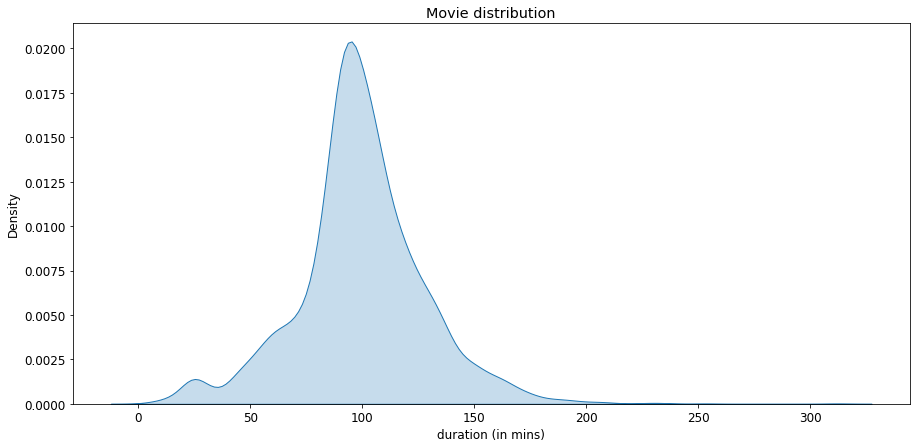

In [83]:
#Plotting distribution for Movie duration
plt.figure(figsize = (15,7))
plt.title("Movie distribution")
sns.kdeplot(data=nf_df[nf_df['type'] == 'Movie']['duration'], shade=True)
plt.xlabel('duration (in mins)')
plt.show()

From the above graph we can infer that most of the movies are around 100mins duration.

#### 9. listed_in / Genre

In [90]:
#Making a dictionary with genre as key and number of movies/shows in each genre as values.
genres = {}
genre_name = []
listed_column_splitted = []
for rowg in nf_df['listed_in']:
  genre_name.extend(rowg.split(","))
    
for g in genre_name:
  if g not in list(genres.keys()):
    genres[g.strip()] = genre_name.count(g)

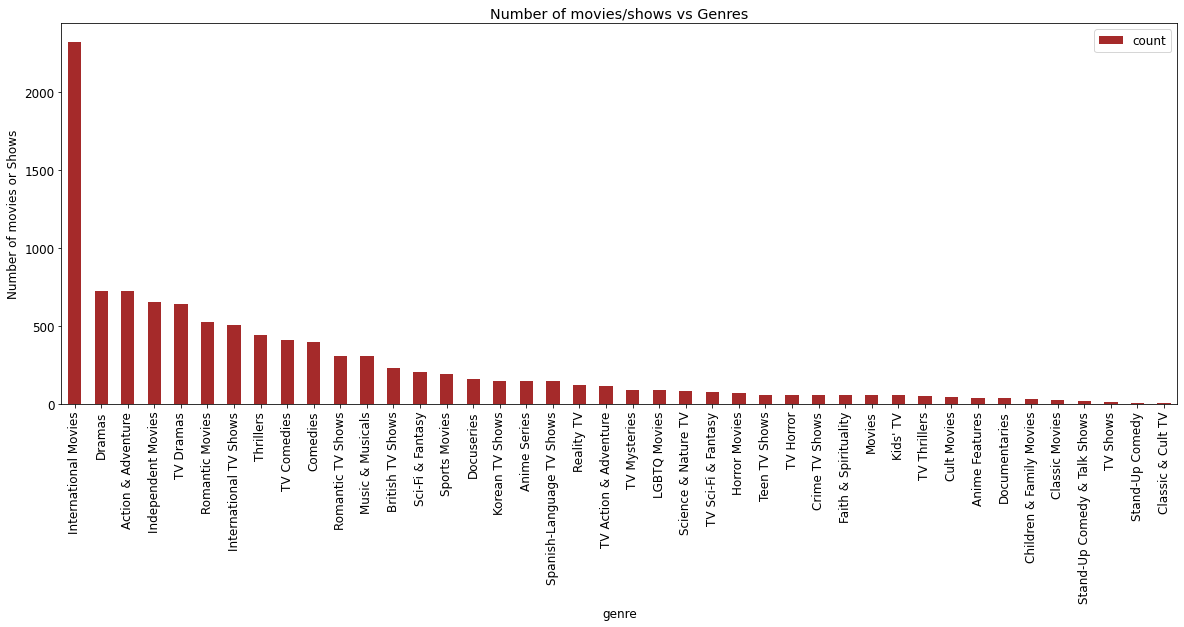

In [95]:
# Creating a DataFrame for cast for plotting & plotting the top 20 cast who are in max number of movies or shows.
genre_df = pd.DataFrame.from_dict(genres, orient='index', columns=['count'])
genre_df.sort_values('count', ascending=False).plot(kind = 'bar', color='brown', figsize = (20,7))
plt.xlabel("genre")
plt.ylabel("Number of movies or Shows")
plt.title("Number of movies/shows vs Genres")
plt.show()

Most of the TV Shows and Movies are from genre International Movies.

#### 10. description

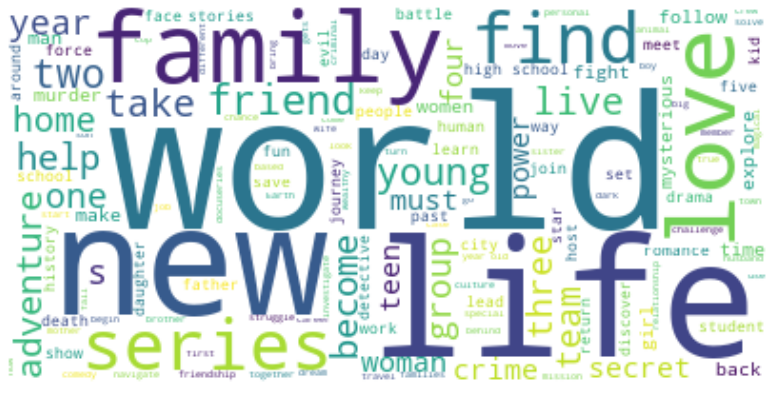

In [98]:
# Visuallizing the wordcloud for description for TV Show
col_word_cloud('description', nf_df[nf_df['type']=='TV Show'])

description of TV Shows contains more words like world, life, family, new, find, love etc. 

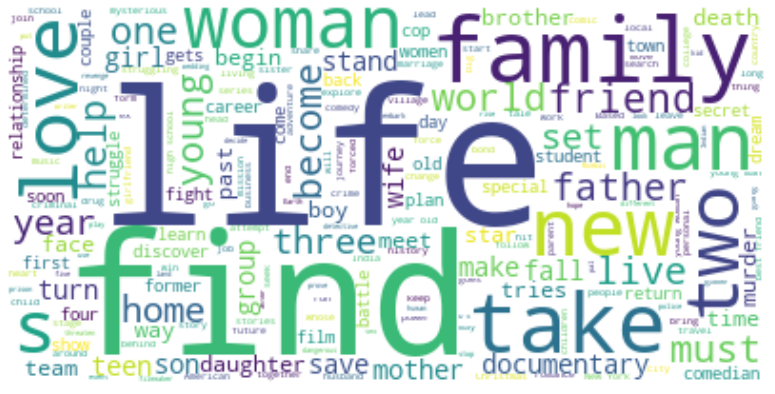

In [99]:
# Visuallizing the wordcloud for description for Movies
col_word_cloud('description', nf_df[nf_df['type']=='Movie'])

description of Movie also contains more words like life, find, family, love etc similar to TV Shows. 

### Bivariate Analysis

#### Chart - 11

In [42]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [43]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [44]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [45]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [46]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [47]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [48]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [49]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [50]:
# Expand Contraction

#### 2. Lower Casing

In [51]:
# Lower Casing

#### 3. Removing Punctuations

In [52]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [53]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [54]:
# Remove Stopwords

In [55]:
# Remove White spaces

#### 6. Rephrase Text

In [56]:
# Rephrase Text

#### 7. Tokenization

In [57]:
# Tokenization

#### 8. Text Normalization

In [58]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [59]:
# POS Taging

#### 10. Text Vectorization

In [60]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [61]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [62]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [63]:
# Transform Your data

### 6. Data Scaling

In [64]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [65]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [66]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [67]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [68]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [73]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [76]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [77]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***